In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Cross_sell_prediction/train.csv')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Cross_sell_prediction/test.csv')
samp = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Cross_sell_prediction/sample_submission_iA3afxn.csv')

In [4]:
'''train_original=train.copy() 
test_original=test.copy()'''

'train_original=train.copy() \ntest_original=test.copy()'

In [5]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [6]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [7]:
samp.head()

,id,Response
0,381110,0
1,381111,0
2,381112,0
3,381113,0
4,381114,0


In [8]:
print("Shape of the Traing dataset: ", train.shape)
print("Shape of the test dataset: ", test.shape)
print("Shape of the sample dataset: ", samp.shape)

Shape of the Traing dataset:  (381109, 12)
Shape of the test dataset:  (127037, 11)
Shape of the sample dataset:  (127037, 2)


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [10]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [11]:
train['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [12]:
train['Vehicle_Age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [13]:
train['Vehicle_Age'] = train['Vehicle_Age'].map({'< 1 Year':0,'1-2 Year':1,'> 2 Years':2})
train['Vehicle_Age'].head()

0    2
1    1
2    2
3    0
4    0
Name: Vehicle_Age, dtype: int64

In [14]:
train['Vehicle_Damage'] = train['Vehicle_Damage'].map({'Yes':1,'No':0})
train['Vehicle_Damage'].head()

0    1
1    0
2    1
3    0
4    0
Name: Vehicle_Damage, dtype: int64

In [15]:
train['Gender'] = train['Gender'].map({'Male':1,'Female':0})
train['Gender'].head()

0    1
1    1
2    1
3    1
4    0
Name: Gender, dtype: int64

In [16]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,0,0,27496.0,152.0,39,0


In [17]:
test['Gender'] = test['Gender'].map({'Male':1,'Female':0})
test['Gender'].head()

0    1
1    1
2    1
3    1
4    1
Name: Gender, dtype: int64

In [18]:
test['Vehicle_Damage'] = test['Vehicle_Damage'].map({'Yes':1,'No':0})
test['Vehicle_Damage'].head()

0    0
1    1
2    1
3    1
4    0
Name: Vehicle_Damage, dtype: int64

In [19]:
test['Vehicle_Age'] = test['Vehicle_Age'].map({'< 1 Year':0,'1-2 Year':1,'> 2 Years':2})
test['Vehicle_Age'].head()

0    0
1    1
2    1
3    0
4    0
Name: Vehicle_Age, dtype: int64

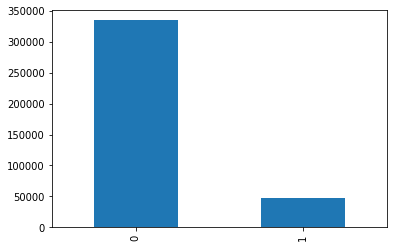

In [20]:
train['Response'].value_counts().plot(kind='bar')

In [21]:
train['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [22]:
#Lets look at all the unique values in the data

for i in train.columns:
    print(i," : distinct_value")
    print(train[i].nunique()," : No. of unique Items")
    print(train[i].unique())
    print("-"*30)
    print("")

id  : distinct_value
381109  : No. of unique Items
[     1      2      3 ... 381107 381108 381109]
------------------------------

Gender  : distinct_value
2  : No. of unique Items
[1 0]
------------------------------

Age  : distinct_value
66  : No. of unique Items
[44 76 47 21 29 24 23 56 32 41 71 37 25 42 60 65 49 34 51 26 57 79 48 45
 72 30 54 27 38 22 78 20 39 62 58 59 63 50 67 77 28 69 52 31 33 43 36 53
 70 46 55 40 61 75 64 35 66 68 74 73 84 83 81 80 82 85]
------------------------------

Driving_License  : distinct_value
2  : No. of unique Items
[1 0]
------------------------------

Region_Code  : distinct_value
53  : No. of unique Items
[28.  3. 11. 41. 33.  6. 35. 50. 15. 45.  8. 36. 30. 26. 16. 47. 48. 19.
 39. 23. 37.  5. 17.  2.  7. 29. 46. 27. 25. 13. 18. 20. 49. 22. 44.  0.
  9. 31. 12. 34. 21. 10. 14. 38. 24. 40. 43. 32.  4. 51. 42.  1. 52.]
------------------------------

Previously_Insured  : distinct_value
2  : No. of unique Items
[0 1]
------------------------------

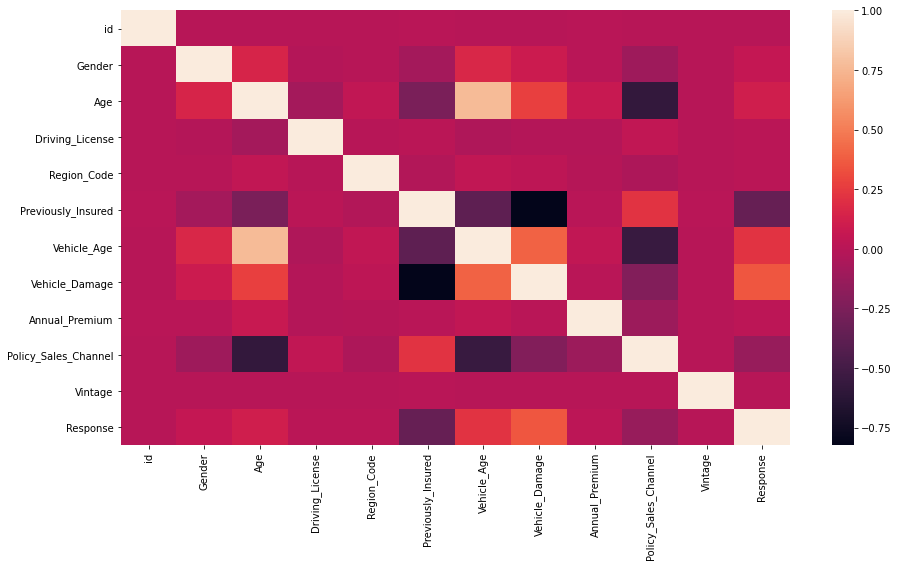

In [23]:
#Data Correlation
plt.figure(figsize=(15,8))
sns.heatmap(train.corr())

In [24]:
train.corr()['Response'].sort_values(ascending = False)

Response                1.000000
Vehicle_Damage          0.354400
Vehicle_Age             0.221874
Age                     0.111147
Gender                  0.052440
Annual_Premium          0.022575
Region_Code             0.010570
Driving_License         0.010155
Vintage                -0.001050
id                     -0.001368
Policy_Sales_Channel   -0.139042
Previously_Insured     -0.341170
Name: Response, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fba64cca0b8>,
      dtype=object)

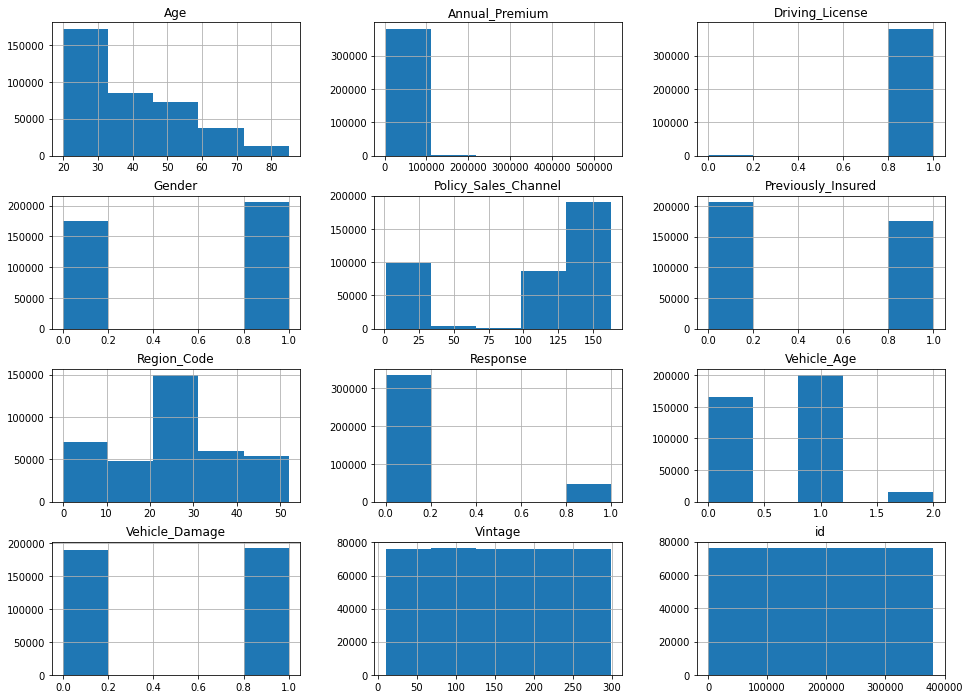

In [25]:
train.hist(bins=5,figsize=(16,12))

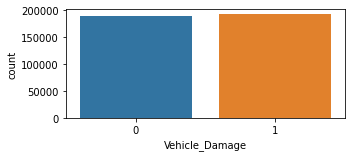

In [26]:
plt.figure(figsize=(5,2))
sns.countplot(x=train['Vehicle_Damage'])


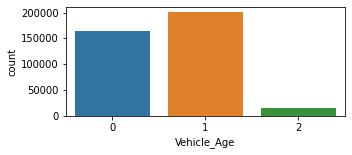

In [27]:
plt.figure(figsize=(5,2))
sns.countplot(x=train['Vehicle_Age'])


In [28]:
X = train.drop(['Response'], axis=1)
y = train['Response']

In [29]:
X.shape, y.shape
X.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217
1,2,1,76,1,3.0,0,1,0,33536.0,26.0,183
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27
3,4,1,21,1,11.0,1,0,0,28619.0,152.0,203
4,5,0,29,1,41.0,1,0,0,27496.0,152.0,39


In [30]:
seed = 7
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=seed)

In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [32]:
models=[]
models.append(("logreg",LogisticRegression()))
models.append(("tree",DecisionTreeClassifier()))
models.append(("lda",LinearDiscriminantAnalysis()))
#models.append(("svc",SVC()))
models.append(("knn",KNeighborsClassifier()))
models.append(("nb",GaussianNB()))

In [33]:
seed=7
scoring='accuracy'

In [34]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
result=[]
names=[]

In [35]:
for name,model in models:
    #print(model)
    kfold=KFold(n_splits=10,random_state=seed)
    cv_result=cross_val_score(model,x_train,y_train,cv=kfold,scoring=scoring)
    result.append(cv_result)
    names.append(name)
    print("%s %f %f" % (name,cv_result.mean(),cv_result.std()))


logreg 0.877291 0.001561
tree 0.822944 0.001460
lda 0.875990 0.001409
knn 0.865574 0.001669
nb 0.875983 0.001637


In [39]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
lda=LinearDiscriminantAnalysis()
lda.fit(x_train,y_train)
lda_pred=lda.predict(x_test)
print(accuracy_score(y_test,lda_pred))
print(confusion_matrix(y_test,lda_pred))
print(classification_report(y_test,lda_pred))

0.8761413967547598
[[83164   478]
 [11323   313]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     83642
           1       0.40      0.03      0.05     11636

    accuracy                           0.88     95278
   macro avg       0.64      0.51      0.49     95278
weighted avg       0.82      0.88      0.83     95278



In [52]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
tree=DecisionTreeClassifier()
tree.fit(x_train,y_train)
tree_pred=tree.predict(x_test)
print(accuracy_score(y_test,tree_pred))
print(confusion_matrix(y_test,tree_pred))
print(classification_report(y_test,tree_pred))

0.8238523058838346
[[74913  8729]
 [ 8054  3582]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     83642
           1       0.29      0.31      0.30     11636

    accuracy                           0.82     95278
   macro avg       0.60      0.60      0.60     95278
weighted avg       0.83      0.82      0.83     95278



In [40]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
nb=GaussianNB()
nb.fit(x_train,y_train)
pred=nb.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8764982472344088
[[83465   177]
 [11590    46]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     83642
           1       0.21      0.00      0.01     11636

    accuracy                           0.88     95278
   macro avg       0.54      0.50      0.47     95278
weighted avg       0.80      0.88      0.82     95278



In [41]:
df_output=pd.DataFrame()

In [55]:
outp=tree.predict(test).astype(int)
outp

array([0, 0, 1, ..., 0, 0, 0])

In [56]:
df_output['id']=test['id']
df_output['Response']=outp

In [57]:
df_output.head(20)

,id,Response
0,381110,0
1,381111,0
2,381112,1
3,381113,0
4,381114,0
5,381115,0
6,381116,0
7,381117,0
8,381118,0
9,381119,0


In [58]:
df_output.shape

(127037, 2)

In [59]:
df_output.to_csv('submission.csv')